## <span style="color:brown">BIG BANG DATA SCIENCE
## <span style="color:brown">Capstone Project - Code #1


## <span style="color:green">Project: AAA Market Segmentation
#### <span style="color:green">Author: Naveed Khan (naveedk786@yahoo.com)
***

![AAA-logo.jpg](AAA-logo.jpg)

<a id="project-overview"></a>
# <span style="color:blue">Project Overview

<div class="alert alert-block alert-info"> 

1.  Provide a market segmentation of AAA members (or member households) that allows AAA Northeast to better serve their members
2.  Develop a series of “look-alike” models to determine the probability of purchasing each product.  Validate your models.
3.  Develop models to predict the likelihood of using roadside service as well as the total cost of roadside usage.  

<a id="I"></a>

## <span style="color:blue"> Part 1.  Reading Data & Exploratory Data Analysis (EDA)

**Importing necessary Libraries**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 70)
import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


**Reading csv Data**

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
aaa = pd.read_csv('member_sample.csv')

In [4]:
aaa = aaa.drop('Unnamed: 0', axis = 1)

In [5]:
aaa.head(2)

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag,INS Client Flag,TRV Globalware Flag,Number of Children,Responded to Catalog,Race,Length Of Residence,Mail Responder,Home Owner,Income,Date Of Birth,Children,Education,Dwelling Type,Credit Ranges,Language,Gender,Active Expiration Date,Address Change Date,Bad Address Flag,Billing Code Description,Birth Date MMDDYYYY,Branch Name,Cancel Date,Cancel Reason,County,Do Not Direct Mail Solicit,Email Available,Email Status,ERS ENT Count Year 1,ERS ENT Count Year 2,ERS ENT Count Year 3,ERS Member Cost Year 1,ERS Member Cost Year 2,ERS Member Cost Year 3,Right_Gender,Right_Individual Key,Join AAA Date,Join Club Date,Member Key,Member Map Location,Member Number Associate ID,Member Phone Type,Member Status,Member Tenure Years,Member Type,Membership ID,Months from Join to Cancel,Opt-Out - Publication,Reason Joined,Reinstate Date,Renew Method,ZIP,Mosaic Household,Mosaic Global Household,kcl_B_IND_MosaicsGrouping,New Mover Flag,Occupation Code,Occupation Group,Right_Dwelling Type,Move Distance,Occupant Type,Breakdown Map Location,Breakdown City,Breakdown State,Basic Cost,Calculated Tow Miles,Call Canceled,Call Killed,Call Status Recv Date,Cash Call,Clearing Code Last Description,Dispatch Code1 Description,Dispatch Code2Description,DTL Prob1 Code Description,Fleet Indicator,Is Duplicate,Is NSR,Member Match Flag,Member Number and Associate ID,Motorcycle Indicator,Plus Cost,Plus Indicator Description,Premier Cost,Prob1 Code Description,Prob2 Code Description,SC Call Club Code Description,SC Date,Rec ID,SC STS RSN Code Description,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Small or large multi-family w/apt number,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,N,N,N,N,N,One Child,NaN,Caucasion / White - English,15.0,Yes,Home Owner,"30-39,999",1922-02-05 00:00:00,Yes,Some College,Small or large multi-family w/apt number,600-649,English,NaN,2020-09-01 00:00:00,2005-01-28 12:41:09,F,New Member,1922-02-05 00:00:00,RI - WARWICK BRANCH,NaN,NaN,KENT,0.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0,65.0,NaN,52211550.0,1970-09-01 00:00:00,1970-09-01 00:00:00,1500014.0,"{41.696,-71.5308}",15300.0,VoIP,ACTIVE,49.0,Primary,153.0,NaN,Opt-In,NaN,2019-08-23 00:00:00,AUTO RENEW,2893.0,Senior Discounts,Low Income Elders,Golden Year Guardians,N,NaN,NaN,NaN,NaN,NaN,"{41,-71}",West Warwick,RI,32.5,0.8,N,N,2017-04-13 10:05:17,Y,CASH CALL ONLY C,Engine Overheat,NaN,Engine Overheat,N,0.0,0.0,1.0,15300.0,N,0.0,Basic Membership,0.0,Tow,NaN,AAA Northeast,2017-04-13 00:00:00,9707320.0,CASH CALL ONLY C,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0


In [6]:
aaa.shape

(21344, 112)

**Normalizing column names**

In [7]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")

aaa.columns = [col.strip().replace(' ', '_').lower() for col in aaa.columns]
aaa.columns = [col.strip().replace('-', '_').lower() for col in aaa.columns]

# Print edited column names
print("\nNew Column Names:\n", aaa.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['individual_key', 'household_key', 'member_flag', 'city',
       'state___grouped', 'zip5', 'zip9', 'fsv_cmsi_flag',
       'fsv_credit_card_flag', 'fsv_deposit_program_flag',
       ...
       'sc_vehicle_manufacturer_name', 'sc_vehicle_model_name',
       'svc_facility_name', 'svc_facility_type', 'total_cost',
       'tow_destination_latitude', 'tow_destination_longitude',
       'tow_destination_name', 'was_duplicated', 'was_towed_to_aar_referral'],
      dtype='object', length=112)


### Dropping unimportant features: duplicate IDs, personal info, etc.

**a.  Redunandant IDs**

Reviewing all the IDs, only two IDs are critical: 'member_key' & 'household_key'. 
'household_key' is same for all the members (Primary & Associates) in the household

In [8]:
aaa = aaa.drop(columns=['right_individual_key','member_number_and_associate_id','membership_id','member_flag',
                       'individual_key','member_number_associate_id'])

**b.  Spatial Info**

In [9]:
aaa = aaa.drop(columns=['city', 'state___grouped', 'zip', 'zip5','zip9','county','branch_name','member_map_location'])

**c.  Personal info**

In [10]:
aaa = aaa.drop(columns=['race', 'gender', 'right_gender','language','education','email_available','email_status',
                        'member_phone_type','date_of_birth','birth_date_mmddyyyy','children','occupation_group'])

**d.  Non-related Membership info**

In [11]:
aaa = aaa.drop(columns=['active_expiration_date','join_club_date','length_of_residence','address_change_date',
                        'bad_address_flag', 'billing_code_description','cancel_date',
                        'cancel_reason','join_aaa_date','months_from_join_to_cancel',
                       'reason_joined','reinstate_date','renew_method','member_match_flag'])

**e.  Service related info**

In [12]:
aaa = aaa.drop(columns=['breakdown_map_location', 'breakdown_city', 'breakdown_state','calculated_tow_miles',
                        'call_canceled','fleet_indicator','sc_call_club_code_description',
                        'call_killed','call_status_recv_date','cash_call','clearing_code_last_description',
                       'dispatch_code1_description','dispatch_code2description','dtl_prob1_code_description',
                       'is_duplicate','is_nsr','prob2_code_description','sc_sts_rsn_code_description',
                        'sc_vehicle_manufacturer_name','sc_vehicle_model_name','svc_facility_name',
                        'tow_destination_latitude','tow_destination_longitude','motorcycle_indicator',
                       'svc_facility_type','tow_destination_name','was_duplicated','was_towed_to_aar_referral'])

**f.  High Cardinality**

In [13]:
aaa = aaa.drop(columns=['occupation_code','prob1_code_description'])

**g.  Removing features with >95% missing values (after using SweetViz)**

In [14]:
aaa = aaa.drop(columns=['responded_to_catalog','right_dwelling_type','move_distance','occupant_type'])

**Moving 'member_key' as the first column**

In [15]:
first_col = aaa.pop('member_key')
aaa.insert(0, 'member_key',first_col)

In [16]:
aaa.head(2)

,member_key,household_key,fsv_cmsi_flag,fsv_credit_card_flag,fsv_deposit_program_flag,fsv_home_equity_flag,fsv_id_theft_flag,fsv_mortgage_flag,ins_client_flag,trv_globalware_flag,number_of_children,mail_responder,home_owner,income,dwelling_type,credit_ranges,do_not_direct_mail_solicit,ers_ent_count_year_1,ers_ent_count_year_2,ers_ent_count_year_3,ers_member_cost_year_1,ers_member_cost_year_2,ers_member_cost_year_3,member_status,member_tenure_years,member_type,opt_out___publication,mosaic_household,mosaic_global_household,kcl_b_ind_mosaicsgrouping,new_mover_flag,basic_cost,plus_cost,plus_indicator_description,premier_cost,sc_date,rec_id,total_cost
0,NaN,10462590.0,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,Small or large multi-family w/apt number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1500014.0,4500791.0,N,Y,N,N,N,N,N,N,One Child,Yes,Home Owner,"30-39,999",Small or large multi-family w/apt number,600-649,0.0,0.0,0.0,2.0,0.0,0.0,65.0,ACTIVE,49.0,Primary,Opt-In,Senior Discounts,Low Income Elders,Golden Year Guardians,N,32.5,0.0,Basic Membership,0.0,2017-04-13 00:00:00,9707320.0,32.5


In [17]:
print("Reduced dataframe size after features removal: ",aaa.shape )

Reduced dataframe size after features removal:  (21344, 38)


**Remove inactive Members**

In [18]:
aaa['member_status'].fillna('UNKNOWN', inplace = True)

In [19]:
aaa['member_status'].value_counts()

ACTIVE       11808
CANCELLED    8177 
PENDING      1358 
UNKNOWN      1    
Name: member_status, dtype: int64

In [20]:
aaa = aaa.loc[(aaa['member_status']!='CANCELLED') & (aaa['member_status']!='UNKNOWN')]

<AxesSubplot:>

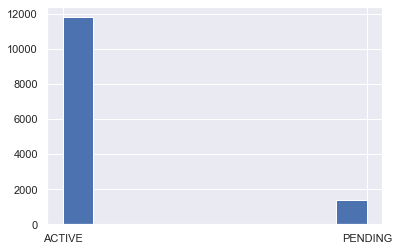

In [21]:
aaa['member_status'].hist()

In [22]:
print("Reduced Memebers size after removal of cancelled members: ")
aaa['member_status'].value_counts()

Reduced Memebers size after removal of cancelled members: 


ACTIVE     11808
PENDING    1358 
Name: member_status, dtype: int64

In [23]:
print("Reduced dataframe size after Cancelled Members removed: ",aaa.shape)

Reduced dataframe size after Cancelled Members removed:  (13166, 38)


**Remove 'member_status' as not needed any more after cleaning the Active & Pending members**

In [24]:
aaa = aaa.drop(columns=['member_status'])

In [25]:
#aaa.groupby('household_key').agg(['count', 'mean','std','min','max','median']).T.head(20)

In [26]:
aaa.describe(include=['object', 'bool'])

,fsv_cmsi_flag,fsv_credit_card_flag,fsv_deposit_program_flag,fsv_home_equity_flag,fsv_id_theft_flag,fsv_mortgage_flag,ins_client_flag,trv_globalware_flag,number_of_children,mail_responder,home_owner,income,dwelling_type,credit_ranges,member_type,opt_out___publication,mosaic_household,mosaic_global_household,kcl_b_ind_mosaicsgrouping,new_mover_flag,plus_indicator_description,sc_date
count,13166,13166,13166,13166,13166,13166,13166,13166,9611,9611,9380,9569,10173,9611,13166,13166,10163,10163,10163,13166,11178,11178
unique,2,2,2,2,2,2,2,2,7,2,4,15,4,9,2,2,62,10,19,2,4,1481
top,N,N,N,N,N,N,N,N,No children,Yes,Home Owner,"100-149,999",SFDU,750-799,Primary,Opt-In,Aging in Place,Comfortable Retirement,Autumn Years,N,Basic Membership,2019-01-22 00:00:00
freq,12368,12098,13125,13161,12726,13140,10402,11511,4336,9227,9051,2129,8661,3260,8011,13075,2084,3263,2181,12639,5887,30


### Data Visualization

In [27]:
corr_matrix = aaa.corr()  # corr(autinsurance)
corr_matrix

,member_key,household_key,do_not_direct_mail_solicit,ers_ent_count_year_1,ers_ent_count_year_2,ers_ent_count_year_3,ers_member_cost_year_1,ers_member_cost_year_2,ers_member_cost_year_3,member_tenure_years,basic_cost,plus_cost,premier_cost,rec_id,total_cost
member_key,1.000000,-0.012206,-0.004686,0.043138,0.048504,0.063688,0.056607,0.062404,0.054179,-0.461549,-0.024498,0.025933,0.001542,-0.004280,0.004210
household_key,-0.012206,1.000000,0.000268,-0.031225,-0.012097,0.011300,-0.034231,-0.015534,0.021126,-0.007779,-0.002107,-0.004485,-0.006080,-0.009942,-0.007960
do_not_direct_mail_solicit,-0.004686,0.000268,1.000000,-0.001251,0.019326,0.012455,-0.000915,0.029439,0.011067,-0.024687,-0.010714,0.002045,-0.001985,0.008910,-0.008451
ers_ent_count_year_1,0.043138,-0.031225,-0.001251,1.000000,0.260569,0.287053,0.941087,0.236600,0.281090,-0.086768,0.035648,0.018131,-0.003985,0.231218,0.033676
ers_ent_count_year_2,0.048504,-0.012097,0.019326,0.260569,1.000000,0.340213,0.251091,0.908167,0.325094,-0.060711,0.046505,0.019382,-0.009282,0.218890,0.044069
ers_ent_count_year_3,0.063688,0.011300,0.012455,0.287053,0.340213,1.000000,0.271477,0.310244,0.925076,-0.081704,0.010670,0.012883,-0.007706,0.042503,0.017346
ers_member_cost_year_1,0.056607,-0.034231,-0.000915,0.941087,0.251091,0.271477,1.000000,0.257626,0.287965,-0.089345,0.074543,0.064487,-0.002708,0.213620,0.091389
ers_member_cost_year_2,0.062404,-0.015534,0.029439,0.236600,0.908167,0.310244,0.257626,1.000000,0.321876,-0.053529,0.091778,0.081953,-0.008089,0.179718,0.120296
ers_member_cost_year_3,0.054179,0.021126,0.011067,0.281090,0.325094,0.925076,0.287965,0.321876,1.000000,-0.078027,0.042081,0.052800,-0.007090,0.036067,0.066317
member_tenure_years,-0.461549,-0.007779,-0.024687,-0.086768,-0.060711,-0.081704,-0.089345,-0.053529,-0.078027,1.000000,0.034757,-0.022297,-0.006860,0.008791,0.006818


<AxesSubplot:>

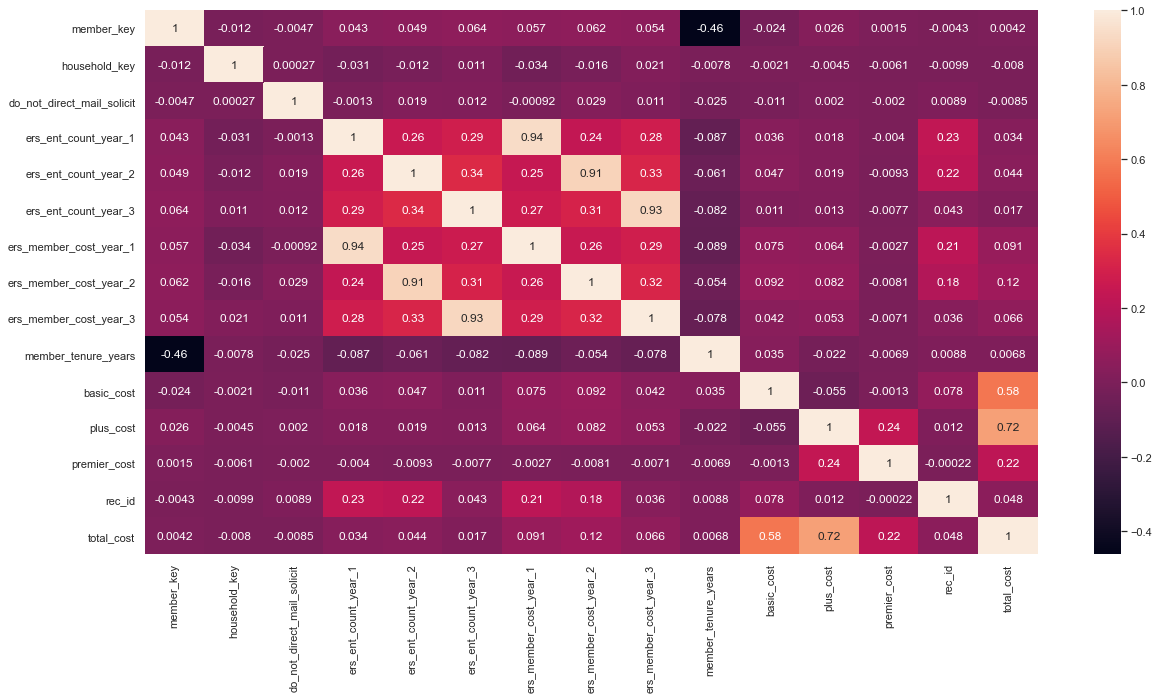

In [28]:
#### Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(aaa.corr(),annot=True)

<a id="IV"></a>
### Visual Data Analysis in with SweetViz


In [29]:
# Import Libraries
print('Importing Libraries ... ',end='')
import sweetviz as sv
import pandas as pd
print('Done')

Importing Libraries ... Done


In [ ]:
# Analyzing data
report=sv.analyze(aaa)

# Generating report
report.show_html('eda_report_EDA.html')

**Save the Clean Data File - Version2**

In [ ]:
aaa.to_csv('aaa_data_Version2.csv')
